&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&ensp;
[Home Page](../Start_Here.ipynb)


[Previous Notebook](Approach_to_the_Problem_&_Inspecting_and_Cleaning_the_Required_Data.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
[1](The_Problem_Statement.ipynb)
[2](Approach_to_the_Problem_&_Inspecting_and_Cleaning_the_Required_Data.ipynb)
[3]
[4](Countering_Data_Imbalance.ipynb)
[5](Competition.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
[Next Notebook](Countering_Data_Imbalance.ipynb)

# Tropical Cyclone Intensity Estimation using a Deep  Convolutional Neural Network - Part 2 

**Contents of this notebook:**

- [Understand the Model Requirements](#Understand-the-Model-requirements)
    - [Exploring Resizing Options](#Exploring-different-types-of-resizing-options)
    - [Choosing a Random Patch](#Step-2-:-Choosing-a-Random-Patch-from-the-Image)
- [Annotating Our Dataset ](#Annotating-our-dataset) 
- [Wrapping Things Up](#Wrapping-Things-Up-:)
    - [Preparing the Dataset](#Preparing-the-Dataset)
    - [Defining our Model](#Defining-our-Model)
    - [Compiling and Training our Model](#Compiling-and-Training-our-Model)
    - [Visualisations](#Visualisations)

**By the end of this Notebook you will:**

- Understand the Model Requirements.
- Annotation of Dataset.
- Train your Model.

## Understand the Model requirements

### We have seen the model to which our image will be fed

- The model described in the paper 
![alt text](images/model.png)

We can see that the images need to be ( 232, 232, 3) in shape to be fed into our model.

So, we will do the following steps before feeding the image into our model.

- Step 1 : Resize Image from ( 1024, 1024 ,3) to ( 256 , 256 ,3 ) 
- Step 2 : Choose a random ( 232 , 232 , 3 ) patch from the ( 256 , 256 , 3 ) and feed into our model.

**Alternate Approach** : We can modify the model's input shape to be ( 256 x 256 x 3 ) and train it on the scaled images, but we take a ( 232 x 232 x 3 ) random patch so that our model does not expect the cyclone to be in the center and learn to understanding the mapping even with the cyclones in the sides of the images.

### Step 1 :
Let's now start with Step 1 and understand all the resizing methods available to do so.

In [1]:
import cv2
#Read the Image Using cv2.imread()
img = cv2.imread('images/image_shape.jpg',1)
#Changing the Color Spaces
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Print the Shape of the Image
img.shape

(1024, 1024, 3)

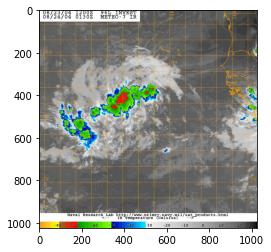

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
#Plot the image
plt.imshow(img)

## Exploring different types of resizing options 

The Images can be resized in different ways. Some methods are as follows (as stated in OpenCV documentation) : 

<h3>Scaling</h3>
<p>Scaling is just resizing of the image. OpenCV comes with a function <b>cv2.resize()</a></b> for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are <b>cv2.INTER_AREA</b> for shrinking and <b>cv2.INTER_CUBIC</b> (slow) &amp; <b>cv2.INTER_LINEAR</b> for zooming. By default, interpolation method used is <b>cv2.INTER_LINEAR</b> for all resizing purposes.

* cv2.INTER_AREA    ( Preferable for Shrinking ) 
* cv2.INTER_CUBIC   ( Preferable for Zooming but slow )
* cv2.INTER_LINEAR  ( Preferable for Zooming and the default option )


### Step 2 : Choosing a Random Patch from the Image

We will use the `np.random.randint()` function from the Numpy toolbox to generate random numbers. The parameters of this function are the upper limits and size of the Output array as mentioned in the [Numpy Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)

## Wrapping things up

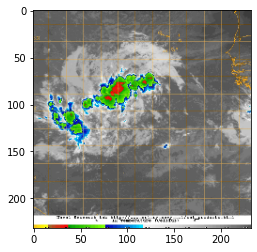

In [3]:
#Import numpy to Generate Random Numbers 
import numpy as np
#Generate random number from [0,0] to [23,23] and define start and end points 
start_pt= np.random.randint(24,size=2)
end_pt = start_pt + [232,232]
# Scale Image and Take a Random patch from it
img  = cv2.resize(img,(256,256))
rand = img[start_pt[0]:end_pt[0],start_pt[1]:end_pt[1]]
plt.imshow(rand)

In [4]:
rand.shape

(232, 232, 3)

The output Of the final images is obtained as (232, 232, 3)

# Annotating our dataset 

Let us start by taking an example of Katrina Hurricane from 2005 and scaling it for all the Cyclones

In [5]:
import pandas as pd
# Read the CSV we saved earlier
df = pd.read_csv('atlantic_storms.csv')
# Create a Mask to Filter our Katrina Cyclone (2005)
mask = (df['date'] > '2005-01-01') & (df['date'] <= '2006-01-01') & ( df['name'] == 'KATRINA')
# Apply the Mask to the Original Data Frame and Extract the new Dataframe
new_df = df.loc[mask]

In [6]:
new_df

,Unnamed: 0,index,id,name,date,record_identifier,status_of_system,latitude,longitude,maximum_sustained_wind_knots,...,34_kt_sw,34_kt_nw,50_kt_ne,50_kt_se,50_kt_sw,50_kt_nw,64_kt_ne,64_kt_se,64_kt_sw,64_kt_nw
44500,44500,44500,AL122005,KATRINA,2005-08-23 18:00:00,NaN,TD,23.1N,75.1W,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44501,44501,44501,AL122005,KATRINA,2005-08-24 00:00:00,NaN,TD,23.4N,75.7W,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44502,44502,44502,AL122005,KATRINA,2005-08-24 06:00:00,NaN,TD,23.8N,76.2W,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44503,44503,44503,AL122005,KATRINA,2005-08-24 12:00:00,NaN,TS,24.5N,76.5W,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44504,44504,44504,AL122005,KATRINA,2005-08-24 18:00:00,NaN,TS,25.4N,76.9W,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44505,44505,44505,AL122005,KATRINA,2005-08-25 00:00:00,NaN,TS,26.0N,77.7W,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44506,44506,44506,AL122005,KATRINA,2005-08-25 06:00:00,NaN,TS,26.1N,78.4W,50,...,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44507,44507,44507,AL122005,KATRINA,2005-08-25 12:00:00,NaN,TS,26.2N,79.0W,55,...,30.0,50.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
44508,44508,44508,AL122005,KATRINA,2005-08-25 18:00:00,NaN,TS,26.2N,79.6W,60,...,50.0,60.0,25.0,25.0,20.0,20.0,0.0,0.0,0.0,0.0
44509,44509,44509,AL122005,KATRINA,2005-08-25 22:30:00,L,HU,26.0N,80.1W,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Getting the list of Images from Our Dataset for Katrina
import os
e = os.listdir('Dataset/tcdat/tc05/ATL/12L.KATRINA/ir/geo/1km')
e.sort()
#Show First five images
e[:5]

['20050823.1245.goes12.x.ir1km.99LINVEST.30kts-1008mb-229N-752W.jpg',
 '20050823.1315.goes12.x.ir1km.99LINVEST.30kts-1008mb-229N-752W.jpg',
 '20050823.1345.goes12.x.ir1km.99LINVEST.25kts-1009mb-221N-747W.jpg',
 '20050823.1415.goes12.x.ir1km.99LINVEST.25kts-1009mb-221N-747W.jpg',
 '20050823.1445.goes12.x.ir1km.99LINVEST.25kts-1009mb-221N-747W.jpg']

#### We can observe, the images are taken once 30 minutes, but the text data is available once every 6 hours.  So we will be interpolating the text data to fit the curve

In [8]:
#Get list of Dates and Velocity from the New Dataframe
date_list = new_df['date'].tolist()
velocity_list = new_df['maximum_sustained_wind_knots'].tolist()

In [9]:
print(date_list[:5])
type(date_list[0])

['2005-08-23 18:00:00', '2005-08-24 00:00:00', '2005-08-24 06:00:00', '2005-08-24 12:00:00', '2005-08-24 18:00:00']


str

The Dates are in STR Format which we will be converting now to datetime format to work with.

In [10]:
from datetime import datetime
# Get and Convert to Datetime format for the First Last recorded time of Text Data.
first = (datetime.strptime(date_list[0], "%Y-%m-%d %H:%M:%S"))
last = (datetime.strptime(date_list[-1], "%Y-%m-%d %H:%M:%S"))
print(first)
type(first)

2005-08-23 18:00:00


datetime.datetime

In [11]:
#Changes the list from Convert everything to seconds from the first image to interpolate the data
for i in range(len(date_list)):
    date_list[i]=( (datetime.strptime(date_list[i], "%Y-%m-%d %H:%M:%S")) - first ).total_seconds()
    print(date_list[i])

0.0
21600.0
43200.0
64800.0
86400.0
108000.0
129600.0
151200.0
172800.0
189000.0
194400.0
216000.0
237600.0
259200.0
280800.0
302400.0
324000.0
345600.0
367200.0
388800.0
410400.0
432000.0
453600.0
475200.0
493800.0
496800.0
506700.0
518400.0
540000.0
561600.0
583200.0
604800.0
626400.0
648000.0


In [12]:
# Interpolate using the Scipy Library Funciton
from scipy import interpolate
func = interpolate.splrep(date_list,velocity_list)

In [13]:
#Getting List of Katrina Images 
import os
e = os.listdir('Dataset/tcdat/tc05/ATL/12L.KATRINA/ir/geo/1km')
# Sort images by time
e.sort()
x=[]
y=[]
for m in e :
    try :
        #Strip the Time Data from image and convert it the a datetime type.
        time_img=(datetime.strptime(m[:13], "%Y%m%d.%H%M"))
        # If the Image is taken between the available text data
        if(time_img>=first and time_img <= last):
            # Get Interpolated Value for that time and Save It 
            value = int(interpolate.splev((time_img-first).total_seconds(),func))
            x.append((time_img-first).total_seconds())
            y.append(value)
    except :
       pass   

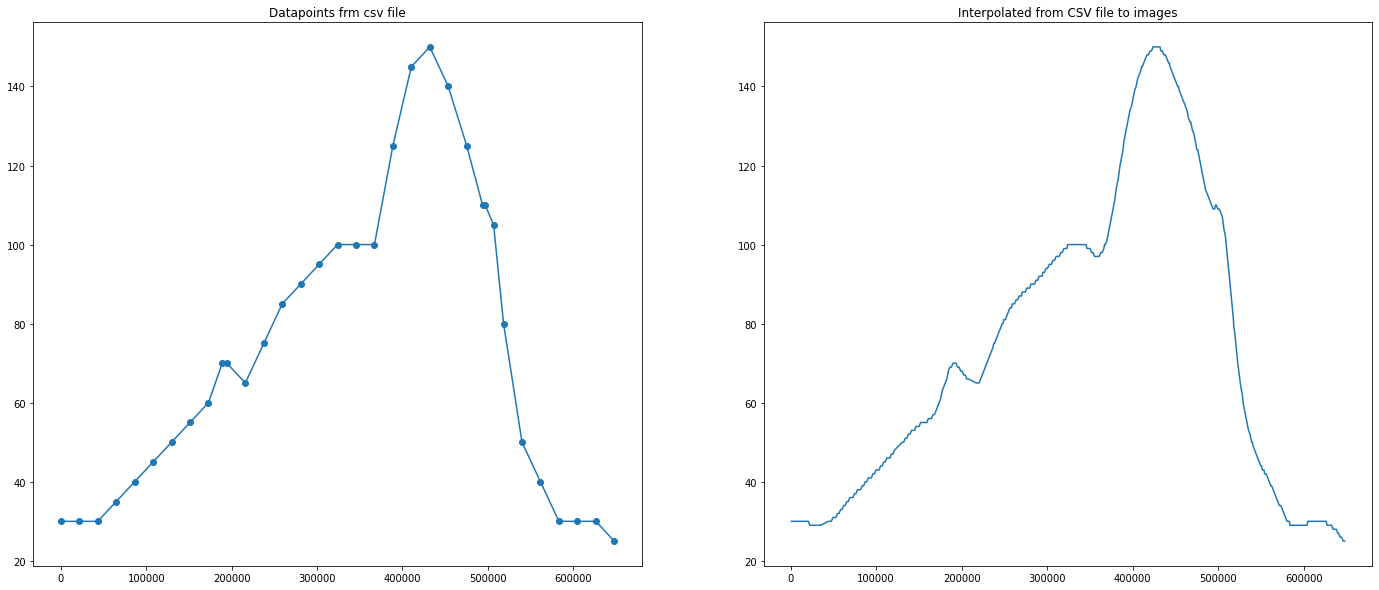

In [14]:
import matplotlib.pyplot as plt
# Plot All the Saved Data Points
f = plt.figure(figsize=(24,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.title.set_text('Datapoints frm csv file')
ax2.title.set_text('Interpolated from CSV file to images')
ax.plot(date_list,velocity_list,'-o')
ax2.plot(x,y)

### Now we have interpolated and found relevant velocity for all images between the recorded text timeframe. Let us now use it for training our Model.

# Wrapping Things Up :

### Preparing the Dataset

#####  All the above modules are joined together and make It into a single function to load data

In [15]:
import sys
sys.path.append('/workspace/python/source_code')
# Import Utlility functions
from utils import * 
# Load dataset
filenames,labels = load_dataset()

................................
27582


In [16]:
val_filenames , val_labels = make_test_set(filenames,labels,val=0.1)

[344, 344, 344, 344, 344, 344, 344, 344]
Counter({2: 7936, 3: 5339, 1: 3803, 4: 2934, 5: 2336, 6: 2178, 7: 204, 0: 100})


# Understand our dataset :

We can see the following lines from the Output : 

`[344, 344, 344, 344, 344, 344, 344, 344]` and `{2: 7936, 3: 5339, 1: 3803, 4: 2934, 5: 2336, 6: 2178, 7: 204, 0: 100}`

This is the distribution of our validation set and training set over it's classes. 

For the validation set we use *Stratified Validation* set so that our validation set nearly respresent the whole class. 


In [17]:
#Make train test set
test = 0.2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(filenames, labels, test_size=test, random_state=1)

# One-Hot Encoding 

`y_train` is a list containing data from 0-7 such as [ 2,4,5,....] but our Model Needs an Input of Array for Each Output as as 1D vector  :

2 --- > [ 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0] 

4 --- > [ 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0] 


This is encoded as such because keeping the other values 0 is necessary for the model to find the model Loss and use backpropagation for making it learn the _Weight Matrix_.

The below given image is an example of One-Hot Encoding :

![alt text](images/one_hot.jfif)

Reference : [What is One Hot Encoding and How to Do It](https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179)

In [18]:
import tensorflow as tf
y_train = tf.one_hot(y_train,depth=8)
y_test = tf.one_hot(y_test,depth=8)
val_labels = tf.one_hot(val_labels,depth=8)

In [19]:
train,test,val = make_dataset((x_train,y_train,128),(x_test,y_test,32),(val_filenames,val_labels,32))

### Defining our Model

![alt_text](images/model.png)

We will be Implementing this model in Keras using the following code

In [20]:
import numpy as np
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"
tf.random.set_seed(1337)

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten ,Dropout, MaxPooling2D
from tensorflow.keras import backend as K 

#Reset Graphs and Create Sequential model
K.clear_session()
model = Sequential()
#Convolution Layers

model.add(Conv2D(64, kernel_size=10,strides=3, activation='relu', input_shape=(232,232,3)))
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
model.add(Conv2D(256, kernel_size=5,strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
model.add(Conv2D(288, kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(Conv2D(272, kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(Conv2D(256, kernel_size=3,strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
model.add(Dropout(0.5))
model.add(Flatten())

#Linear Layers 

model.add(Dense(3584,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dense(8, activation='softmax'))

# Print Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 64)        19264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 33, 256)       409856    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 288)       663840    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 288)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 272)       7

### Compiling and Training our Model

We will be using the following : 

- Optimizer : SGD ( Stochastic Gradient Descent ) with parameters mentioned in the research paper.
    - Learning Rate : 0.001
    - Momentum : 0.9
- Loss Function : Categorical Cross Entropy ( Used in Multi-class classification ) 
- Metrics : We will be using two metrics to determine how our model performs 
    - Accuracy  : Number of Predictions correct / Total number of Predictions
    - Top -2 Accuracy : Top-2 accuracy means that any of your model 2 highest probability answers must match the expected answer.


In [21]:
import functools

# Include Top-2 Accuracy Metrics 
top2_acc = functools.partial(tensorflow.keras.metrics.top_k_categorical_accuracy, k=2)
top2_acc.__name__ = 'top2_acc'

#Define Number of Epochs
epochs = 4

#But Training our model from scratch will take a long time
#So we will load a partially trained model to speedup the process 
model.load_weights("trained_16.h5")

# Optimizer
sgd = tensorflow.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)


#Compile Model with Loss Function , Optimizer and Metrics
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, 
              optimizer=sgd,
              metrics=['accuracy',top2_acc])

# Train the Model 
trained_model = model.fit(train,
          epochs=epochs,
          verbose=1,
          validation_data=val)

# Test Model Aganist Validation Set
score = model.evaluate(test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/4
156/156 [==============================] - 58s 285ms/step - loss: 0.6027 - accuracy: 0.7825 - top2_acc: 0.9255 - val_loss: 0.6667 - val_accuracy: 0.7736 - val_top2_acc: 0.9121
Epoch 2/4
156/156 [==============================] - 11s 73ms/step - loss: 0.5462 - accuracy: 0.8001 - top2_acc: 0.9341 - val_loss: 0.5880 - val_accuracy: 0.8012 - val_top2_acc: 0.9273
Epoch 3/4
156/156 [==============================] - 11s 73ms/step - loss: 0.4933 - accuracy: 0.8211 - top2_acc: 0.9450 - val_loss: 0.6152 - val_accuracy: 0.7958 - val_top2_acc: 0.9339
Epoch 4/4
156/156 [==============================] - 12s 74ms/step - loss: 0.4526 - accuracy: 0.8351 - top2_acc: 0.9521 - val_loss: 0.5021 - val_accuracy: 0.8325 - val_top2_acc: 0.9411
Test loss: 0.3461168706417084
Test accuracy: 0.8793798089027405


### Visualisations

Let us now visualise how our model perfromed during the training process : 

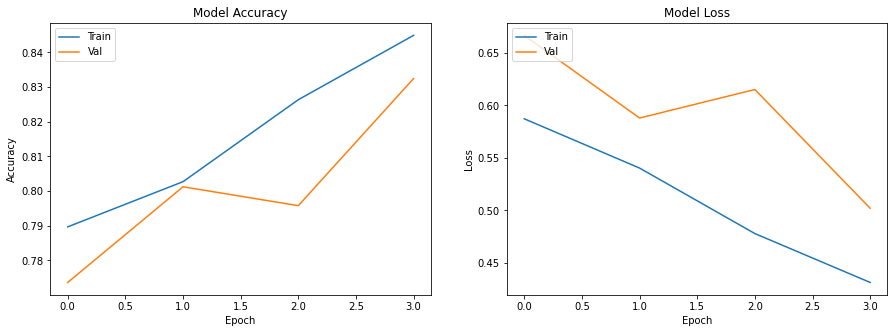

In [22]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax.plot(trained_model.history['accuracy'])
ax.plot(trained_model.history['val_accuracy'])
ax.set_title('Model Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Val'])

ax2 = f.add_subplot(122)
ax2.plot(trained_model.history['loss'])
ax2.plot(trained_model.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Val'],loc= 'upper left')

plt.show()

## Confusion Matrix :

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

Here , the rows display the predicted class and the columns are the truth value of the classes.From this we can estimate how our model performs over different classes which would in turn help us determine how our data should be fed into our model.




<AxesSubplot:>

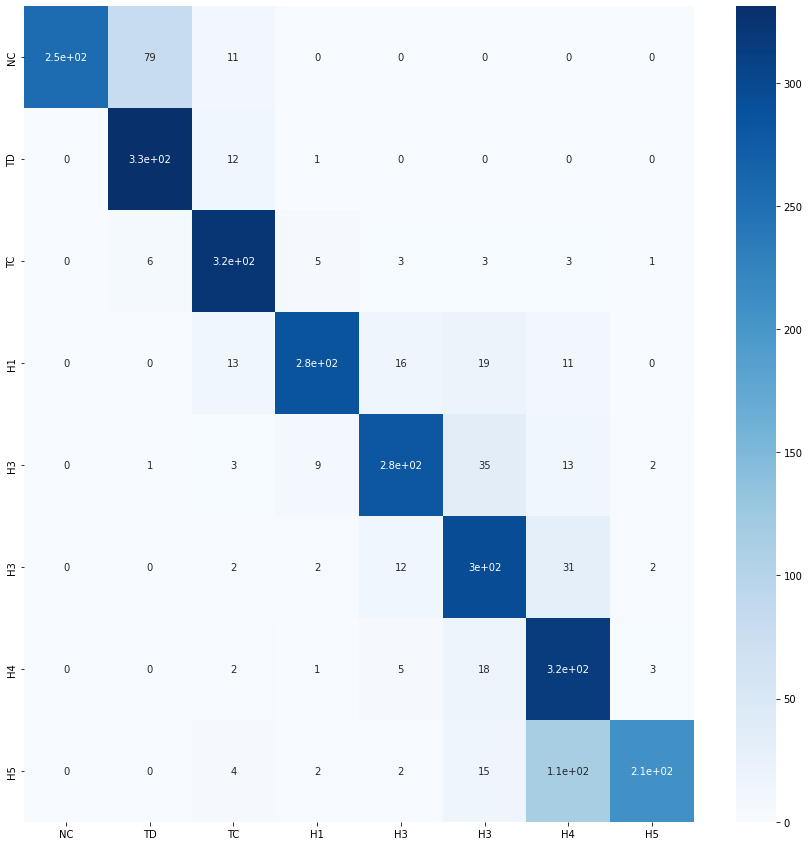

In [23]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import pandas as pd

#Plotting a heatmap using the confusion matrix
pred = model.predict(val)
p = np.argmax(pred, axis=1)
y_valid = np.argmax(val_labels, axis=1, out=None)
results = confusion_matrix(y_valid, p) 
classes=['NC','TD','TC','H1','H3','H3','H4','H5']
df_cm = pd.DataFrame(results, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (15,15))

sn.heatmap(df_cm, annot=True, cmap="Blues")

### Congralutions on running your first model. Now In the next notebook , let us try to understand the drawbacks of this model and make it better :


We can notice that the validation accuracy is lesser than the training accuracy. This is because the model is not properly Regularized and the possible reasons are : 

**Not enough data-points / Imbalanced classes**

Using different techniques we will be regulating and normalising the model in the upcoming notebook.

## Important:
<mark>Shutdown the kernel before clicking on “Next Notebook” to free up the GPU memory.</mark>

## Licensing
This material is released by OpenACC-Standard.org, in collaboration with NVIDIA Corporation, under the Creative Commons Attribution 4.0 International (CC BY 4.0).

[Previous Notebook](Approach_to_the_Problem_&_Inspecting_and_Cleaning_the_Required_Data.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
[1](The_Problem_Statement.ipynb)
[2](Approach_to_the_Problem_&_Inspecting_and_Cleaning_the_Required_Data.ipynb)
[3]
[4](Countering_Data_Imbalance.ipynb)
[5](Competition.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
[Next Notebook](Countering_Data_Imbalance.ipynb)

&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&ensp;
[Home Page](../Start_Here.ipynb)